# Project 2 #

Max Welsch 1265942
Hanshi Tang 1266337


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

pd.set_option('display.max_columns', None)

In [30]:
# read the csvs
test_dataset = pd.read_csv('test_dataset.csv')
train_dataset = pd.read_csv('train_dataset.csv')

train_X = train_dataset.drop(columns=['imdb_score_binned'])
train_y = train_dataset['imdb_score_binned']

In [15]:
train_dataset.head(10)

id       director_name  num_critic_for_reviews  duration  \
0   1        Roger Allers                     186        73   
1   2    George A. Romero                     252        97   
2   3  David Gordon Green                     232       117   
3   4      John Carpenter                     297       109   
4   5       Peter Jackson                     297       171   
5   6   Steven Soderbergh                     186       116   
6   7         Roger Avary                      37        99   
7   8        George Cukor                      82       170   
8   9     Lasse Hallström                     107       108   
9  10        Lajos Koltai                      73       134   

   director_facebook_likes  actor_3_facebook_likes     actor_2_name  \
0                       28                     847      Nathan Lane   
1                        0                     233    Shawn Roberts   
2                      234                     221     Tye Sheridan   
3                        0                     145    Richard Masur   
4                        0                     857    Orlando Bloom   
5                        0                     471       Bernie Mac   
6                      675                     164  Salvator Xuereb   
7                      165                     244     Rex Harrison   
8                      529                      83   Camryn Manheim   
9                       45                       0  Péter Fancsikai   

   actor_1_facebook_likes      gross  \
0                    2000  422783777   
1                     654   20433940   
2                   12000     371897   
3                     957   13782838   
4                   16000  313837577   
5                   11000  183405771   
6                     902     418953   
7                     453   72000000   
8                   11000    8535575   
9                       9     195888   

                                     genres       actor_1_name  \
0  Adventure|Animation|Drama|Family|Musical  Matthew Broderick   
1                                    Horror         Tony Nappo   
2                                     Drama       Nicolas Cage   
3                     Horror|Mystery|Sci-Fi    Wilford Brimley   
4            Action|Adventure|Drama|Fantasy    Christopher Lee   
5                            Crime|Thriller          Brad Pitt   
6                      Crime|Drama|Thriller        Eric Stoltz   
7              Drama|Family|Musical|Romance       Jeremy Brett   
8                                     Drama     Morgan Freeman   
9                         Drama|Romance|War       Marcell Nagy   

                                         movie_title  num_voted_users  \
0                                     The Lion King            644348   
1                                  Land of the Dead             78883   
2                                               Joe             36494   
3                                         The Thing            258078   
4  The Lord of the Rings: The Fellowship of the R...          1238746   
5                                    Ocean's Eleven            402645   
6                                       Killing Zoe             17322   
7                                      My Fair Lady             66959   
8                                An Unfinished Life             24033   
9                                          Fateless              5603   

   cast_total_facebook_likes         actor_3_name  facenumber_in_poster  \
0                       6458        Niketa Calame                     0   
1                       1876    Pedro Miguel Arce                     8   
2                      13607  Ronnie Gene Blevins                     2   
3                       1757        David Clennon                     0   
4                      22342           Billy Boyd                     2   
5                      13028        Elliott Gould                     4   
6                       1582  

Visualise the data - here we can see actually a zero R model will perform okay lol.

(array([  24.,    0.,  235.,    0.,    0., 1839.,    0.,  777.,    0.,
         129.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

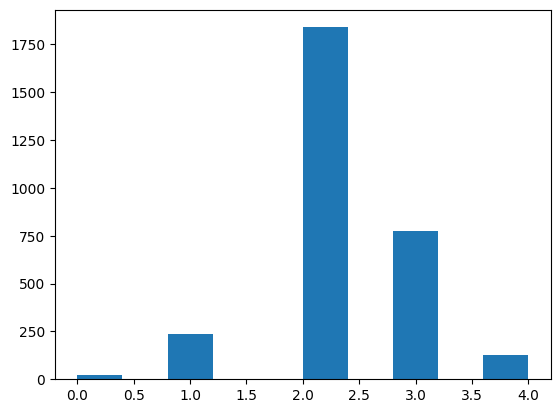

In [16]:
plt.hist(train_dataset['imdb_score_binned'])

# MODEL 1  ZERO R #
This will just be a zero R model. Based on the histogram it SHOULD perform okay

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

zero_r_classifier = DummyClassifier(strategy='most_frequent')

scores = cross_val_score(zero_r_classifier, train_X, train_y, cv=5)
print(f"Scores for Zero R: {scores}")
print(f"Average score: {np.mean(scores)}")

Scores for Zero R: [0.61231281 0.61231281 0.61231281 0.61064892 0.61333333]
Average score: 0.6121841375485302


Now fit it to the training data

In [18]:
zero_r_classifier.fit(train_X, train_y)

DummyClassifier(strategy='most_frequent')

In [19]:
predictions = zero_r_classifier.predict(test_dataset)

In [20]:
zero_r_predictions = pd.DataFrame(predictions, columns=['imdb_score_binned'])
zero_r_predictions.index = pd.RangeIndex(start=1, stop=len(predictions)+ 1, step=1)
zero_r_predictions.to_csv('zero_r_predictions.csv', index=True, index_label='id')

In [21]:
zero_r_predictions

imdb_score_binned
1                    2
2                    2
3                    2
4                    2
5                    2
..                 ...
748                  2
749                  2
750                  2
751                  2
752                  2

[752 rows x 1 columns]

# TO IMPLEMENT: #

A random forest method

A logistic regression

Naive Bayes

SVM (with PCA dimensionality reduction)


MIN MAX SCALE, ONE HOT ENCODE, AND USE CHI SQ



# One hot encoding and minmaxing

In [31]:
train_X['genres'] = train_X['genres'].apply(lambda x: x.split('|'))
train_X['plot_keywords'] = train_X['plot_keywords'].apply(lambda x: x.split('|'))
train_X

id       director_name  num_critic_for_reviews  duration  \
0        1        Roger Allers                     186        73   
1        2    George A. Romero                     252        97   
2        3  David Gordon Green                     232       117   
3        4      John Carpenter                     297       109   
4        5       Peter Jackson                     297       171   
...    ...                 ...                     ...       ...   
2999  3000          Ken Kwapis                     161       129   
3000  3001          Ron Howard                     393       123   
3001  3002        F. Gary Gray                     216       118   
3002  3003       Nadine Labaki                     109        95   
3003  3004      Eugenio Derbez                      41       115   

      director_facebook_likes  actor_3_facebook_likes     actor_2_name  \
0                          28                     847      Nathan Lane   
1                           0                     233    Shawn Roberts   
2                         234                     221     Tye Sheridan   
3                           0                     145    Richard Masur   
4                           0                     857    Orlando Bloom   
...                       ...                     ...              ...   
2999                       42                      49  Sabrina Revelle   
3000                     2000                     471     Olivia Wilde   
3001                      473                     963      Leslie Bibb   
3002                        0                       0       Adel Karam   
3003                      399                      83  Jessica Lindsey   

      actor_1_facebook_likes      gross  \
0                       2000  422783777   
1                        654   20433940   
2                      12000     371897   
3                        957   13782838   
4                      16000  313837577   
...                      ...        ...   
2999                      97   93952276   
3000                   26000   26903709   
3001                   18000   73343413   
3002                     227    1060591   
3003                     399   44456509   

                                              genres       actor_1_name  \
0     [Adventure, Animation, Drama, Family, Musical]  Matthew Broderick   
1                                           [Horror]         Tony Nappo   
2                                            [Drama]       Nicolas Cage   
3                          [Horror, Mystery, Sci-Fi]    Wilford Brimley   
4                [Action, Adventure, Drama, Fantasy]    Christopher Lee   
...                                              ...                ...   
2999                        [Comedy, Drama, Romance]       Carmen Perez   
3000               [Action, Biography, Drama, Sport]    Chris Hemsworth   
3001                        [Crime, Drama, Thriller]      Gerard Butler   
3002                        [Comedy, Drama, Romance]  Yasmine Al Massri   
3003                                 [Comedy, Drama]     Eugenio Derbez   

                                            movie_title  num_voted_users  \
0                                        The Lion King            644348   
1                                     Land of the Dead             78883   
2                                                  Joe             36494   
3                                            The Thing            258078   
4     The Lord of the Rings: The Fellowship of the R...          1238746   
...                                                 ...              ...   
2999                       He's Just Not That Into You            132048   
3000                                              Rush            312629   
3001                               Law Abiding Citizen            217480   
3002                                           Caramel              9750   
3003                         Instructions Not In

preliminary one hot encoding. I use fit_transform on the train, and JUST fit on the test X

In [44]:
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer


mlb = MultiLabelBinarizer()
encoder = OneHotEncoder(handle_unknown='ignore')

to_be_encoded_X_train = train_X[['director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name', 'language', 'country', 'content_rating']]
encoded_X_train = encoder.fit_transform(to_be_encoded_X_train)
encoded_X_train_df = pd.DataFrame.sparse.from_spmatrix(encoded_X_train, columns=encoder.get_feature_names_out(['director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name', 'language', 'country', 'content_rating']))
encoded_X_train_df

to_be_encoded_X_test = test_dataset[['director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name', 'language', 'country', 'content_rating']]
encoded_X_test = encoder.transform(to_be_encoded_X_test)
encoded_X_test_df = pd.DataFrame.sparse.from_spmatrix(encoded_X_test, columns=encoder.get_feature_names_out(['director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name', 'language', 'country', 'content_rating']))
encoded_X_test_df

director_name_Aaron Seltzer  director_name_Abel Ferrara  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   
..                           ...                         ...   
747                          0.0                         0.0   
748                          0.0                         0.0   
749                          0.0                         0.0   
750                          0.0                         0.0   
751                          0.0                         0.0   

     director_name_Adam Marcus  director_name_Adam McKay  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
..                         ...                       ...   
747                        0.0                       0.0   
748                        0.0                       0.0   
749                        0.0                       0.0   
750                        0.0                       0.0   
751                        0.0                       0.0   

     director_name_Adam Rapp  director_name_Adam Rifkin  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   
..                       ...                        ...   
747                      0.0                        0.0   
748                      0.0                        0.0   
749                      0.0                        0.0   
750                      0.0                        0.0   
751                      0.0                        0.0   

     director_name_Adam Shankman  director_name_Adrian Lyne  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
..                           ...                        ...   
747                          0.0                        0.0   
748                          0.0                        0.0   
749                          0.0                        0.0   
750                          0.0                        0.0   
751                          0.0                        0.0   

     director_name_Adrienne Shelly  director_name_Aki Kaurismäki  \
0                              0.0                           0.0   
1                              0.0                           0.0   
2                              0.0                           0.0   
3                              0.0                           0.0   
4                              0.0                           0.0   
..                             ...                           ...   
747                            0.0                           0.0   
748                            0.0                           0.0   
749                            0.0                           0.0   
750                            0.0                           0.0   
751                            0.0                           0.0   

     director_name_Akira Kurosawa  director_name_Akiva Schaffer  \
0                             0.0                           0.0   
1                             0.0                           0.0   
2                             0

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn, encoded_X_train_df.values, train_y, cv=5)

print(scores)
print(np.mean(scores))



[0.36439268 0.61064892 0.58402662 0.5890183  0.61666667]
0.5529506378258457


In [11]:
train_dataset.head()

id       director_name  num_critic_for_reviews  duration  \
0   1        Roger Allers                     186        73   
1   2    George A. Romero                     252        97   
2   3  David Gordon Green                     232       117   
3   4      John Carpenter                     297       109   
4   5       Peter Jackson                     297       171   

   director_facebook_likes  actor_3_facebook_likes   actor_2_name  \
0                       28                     847    Nathan Lane   
1                        0                     233  Shawn Roberts   
2                      234                     221   Tye Sheridan   
3                        0                     145  Richard Masur   
4                        0                     857  Orlando Bloom   

   actor_1_facebook_likes      gross  \
0                    2000  422783777   
1                     654   20433940   
2                   12000     371897   
3                     957   13782838   
4                   16000  313837577   

                                     genres       actor_1_name  \
0  Adventure|Animation|Drama|Family|Musical  Matthew Broderick   
1                                    Horror         Tony Nappo   
2                                     Drama       Nicolas Cage   
3                     Horror|Mystery|Sci-Fi    Wilford Brimley   
4            Action|Adventure|Drama|Fantasy    Christopher Lee   

                                         movie_title  num_voted_users  \
0                                     The Lion King            644348   
1                                  Land of the Dead             78883   
2                                               Joe             36494   
3                                         The Thing            258078   
4  The Lord of the Rings: The Fellowship of the R...          1238746   

   cast_total_facebook_likes         actor_3_name  facenumber_in_poster  \
0                       6458        Niketa Calame                     0   
1                       1876    Pedro Miguel Arce                     8   
2                      13607  Ronnie Gene Blevins                     2   
3                       1757        David Clennon                     0   
4                      22342           Billy Boyd                     2   

                                       plot_keywords  num_user_for_reviews  \
0           king|prince|scar|uncle|unnecessary guilt                   656   
1  apocalypse|mercenary|skyscraper|urban setting|...                   662   
2  alcoholic|cigarette smoking|father son relatio...                   118   
3  alien creature|alien life form|antarctica|isol...                   911   
4                 elf|hobbit|middle earth|quest|ring                  5060   

  language      country content_rating  title_year  actor_2_facebook_likes  \
0  English          USA              G        1994                     886   
1  English       Canada              R        2005                     529   
2  English          USA              R        2013                    1000   
3  English          USA              R        1982                     163   
4  English  New Zealand          PG-13        2001                    5000   

   movie_facebook_likes                                    title_embedding  \
0                 17000  [-4.1984697e-03  4.2941985e-03 -1.1961063e-03 ...   
1                     0  [-4.7586653e-03  2.6511205e-03 -3.7954253e-04 ...   
2                 11000  [ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...   
3                 23000  [-5.32674184e-03  3.60742491e-03  7.91795843e-...   
4                 21000  [-4.2586620e-03  3.6257182e-03 -1.5326265e-03 ...   

   average_degree_centrality  imdb_score_binned  
0                   0.001576                  4  
1                   0.000675                  2  
2                   0.003002                  2  
3                   0.001726                  4  
4                   0.00

In [36]:
string = '[1, 2, 3]'
list(string)

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

title_MinMax = scaler.fit_transform(train_X['title_embedding'].apply(lambda x: ast.literal_eval(x)))
title_MinMax

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)